In [ ]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
# from google.colab import files

In [ ]:
sns.set_theme()

# Funciones auxiliares

In [ ]:
def producto_escalar_vector_fila_vector_columna(fila: list[list[float]],
                                                columna: list[list[float]]) -> float:
    res = 0
    for i in range(len(fila[0])):
        res += fila[0][i]*columna[i][0]
    return res


def columna_en_indice_de_matriz(A: list[list[float]], i: int) -> list[list[float]]:
    return [[fila[i]] for fila in A]


def suma_matricial(A: list[list[float]],
                   B: list[list[float]]) -> list[list[float]]:
    res = A[:]
    for i in range(len(A)):
        for j in range(len(A[0])):
            res[i][j] = A[i][j] + B[i][j]
    return res


def producto_por_escalar(A: list[list[float]],
                         k: float) -> list[list[float]]:
    res = A[:]
    for i in range(len(A)):
        for j in range(len(A[0])):
            res[i][j] = k*A[i][j]
    return res


def transpuesta(A: list[list[float]]) -> list[list[float]]:
    res = [[] for _ in range(len(A[0]))]
    for fila in A:
        for i, elem in enumerate(fila):
            res[i].append(elem)
    return res


def aplanar_vector_col(v: list[list[float]]) -> list[float]:
    return transpuesta(v)[0]


def producto_matricial(A: list[list[float]],
                       B: list[list[float]]) -> list[list[float]]:
    res = [[] for _ in range(len(A))]
    for i, fila in enumerate(A):
        for j in range(len(B[0])):
            columna = columna_en_indice_de_matriz(B, j)
            ABij = producto_escalar_vector_fila_vector_columna([fila], columna)
            res[i].append(ABij)
    return res


def igualdad_con_tolerancia(A: list[list[float]],
                            B: list[list[float]],
                            atol: float = 0):
    """
    Requiere que A y B sean matrices de igual dimensión.
    """
    res = True
    i = 0
    while i < len(A) and res:
        j = 0
        while j < len(A[0]) and res:
            res = abs(A[i][j] - B[i][j]) <= atol
            j += 1
        i += 1
    return res

# Funciones auxiliares para medición de tiempos de cómputo

In [ ]:
def generar_triangular_inferior(n: int, min: float, max: float) -> list[list[float]]:
    res = []
    for i in range(n):
        res.append([])
        for j in range(n):
            if i >= j:
                res[-1].append(min + random.random()*(max - min))
            else:
                res[-1].append(.0)
    return res


def generar_tridiagonal(n: int, min: float, max: float) -> list[list[float]]:
    res = [[0.]*n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if abs(i - j) <= 1:
                res[i][j] = min + random.random()*(max - min)
            else:
                res[i][j] = .0
    return res


def generar_diagonales_tridiagonal(n: int, min: float, max: float) -> tuple[list[list[float]]]:
    res = []
    for i in range(n*3-2):
        res.append(min + random.random()*(max - min))
    res = [0.] + res + [0.]
    a = [res[:n]]
    b = [res[n:2*n]]
    c = [res[2*n:]]
    return a, b, c


def generar_grupo_triangulares_inferiores(cantidad_total: int, n: int, min: float, max: float) -> list[list[list[float]]]:
    return [generar_triangular_inferior(n, min, max) for _ in range(cantidad_total)]


def generar_grupo_tridiagonales(cantidad_total: int, n: int, min: float, max: float) -> list[list[list[float]]]:
    return [generar_tridiagonal(n, min, max) for _ in range(cantidad_total)]


def generar_grupo_diagonales_tridiagonal(cantidad_total: int, n: int, min: float, max: float) -> list[tuple[list[list[float]]]]:
    return [generar_diagonales_tridiagonal(n, min, max) for _ in range(cantidad_total)]


def ejecutar_algoritmo_eg_sin_pivoteo(matrices: list[list[list[float]]]) -> None:
    A = matrices.pop()
    b = [[1.] for _ in range(len(A))]
    solucion_sistema_lineal_eliminacion_gaussiana_sin_pivoteo(A, b)


def ejecutar_algoritmo_eg_con_pivoteo_parcial(matrices: list[list[list[float]]]) -> None:
    A = matrices.pop()
    b = [[1.] for _ in range(len(A))]
    solucion_sistema_lineal_eliminacion_gaussiana_pivoteo_parcial(A, b)


def diagonales_de_matriz_tridiagonal(matriz_tridiagonal: list[list[float]]) -> tuple[list[list[float]], list[list[float]], list[list[float]]]:
    n = len(matriz_tridiagonal)
    a = [[0] + [matriz_tridiagonal[i][i+1] for i in range(n-1)]]
    b = [[matriz_tridiagonal[i][i] for i in range(n)]]
    c = [[matriz_tridiagonal[i][i-1] for i in range(1,n)] + [0]]
    return a, b, c


def generar_diagonales_de_matrices_tridiagonales(matrices: list[list[list[float]]]) -> list[tuple[list[list[float]], list[list[float]], list[list[float]]]]:
    res = []
    for A in matrices:
        res.append(diagonales_de_matriz_tridiagonal(A))
    return res


def ejecutar_algoritmo_eg_tridiagonales(matrices_tridiagonales: list[tuple[list[list[float]], list[list[float]], list[list[float]]]]) -> None:
    A = matrices_tridiagonales.pop()
    a, b, c = diagonales_de_matriz_tridiagonal(A)
    d = [[1.] for _ in range(len(A))]
    solucion_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a, b, c, d)


def ejecutar_algoritmo_eg_diagonales(diagonales_matrices_tridiagonales: list[tuple[list[list[float]], list[list[float]], list[list[float]]]]) -> None:
    diagonales = diagonales_matrices_tridiagonales.pop()
    a, b, c = diagonales[0], diagonales[1], diagonales[2]
    d = [[1.] for _ in range(len(A))]
    solucion_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a, b, c, d)


def generar_matriz_y_ejecutar_algoritmo_eg_tridiagonales(n: int, min: float, max: float) -> None:
    A = generar_tridiagonal(n, min, max)
    a, b, c = diagonales_de_matriz_tridiagonal(A)
    d = [[1.] for _ in range(len(A))]
    solucion_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a, b, c, d)


def ejecutar_algoritmo_eg_diagonales_sin_precomputo_matriz_unica(diagonales: tuple[list[list[float]], list[list[float]], list[list[float]]]) -> None:
    a, b, c = diagonales
    d = [[1.] for _ in range(len(A))]
    solucion_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a, b, c, d)


def ejecutar_algoritmo_eg_diagonales_con_precomputo_matriz_unica(diagonal_precomputada: list[list[float]], operaciones: list[list[float]]) -> None:
    d = [[1.] for _ in range(len(A))]
    solucion_sistema_tridiagonal_precomputado(diagonal_precomputada, d, operaciones)

# 1. Eliminación Gaussiana sin pivoteo

In [ ]:
def solucion_sistema_lineal_eliminacion_gaussiana_sin_pivoteo(A: list[list[float]],
                                                              b: list[list[float]]) -> list[list[float]]:
    """
    A es la matriz cuadrada de coeficientes, b es el vector columna de términos
    independientes. Devuelve x, el vector solución única de Ax = b.
    Si no puede encontrar tal solución, devuelve una excepción.
    """
    A_prima = [fila + b[i] for i, fila in enumerate(A)]
    escalonar_matriz_sin_pivoteo(A_prima)
    return solucion_unica_sistema_lineal(A_prima)


def escalonar_matriz_sin_pivoteo(A: list[list[float]]) -> None:
    for i in range(len(A)): # Para cada fila de A
        pivote = A[i][i] # tomar como pivote al elemento en la diagonal.
        if pivote == 0 and any([A[j][i] != 0 for j in range(i+1, len(A))]):
            return Exception("No puede encontrarse una solución única (0 en la diagonal)")
        else:
            eliminar_columna(A, i, pivote)


def eliminar_columna(A: list[list[float]], i: int, pivote: float) -> None:
    for j, fila in enumerate(A[i+1:], start = i+1): # Para cada fila debajo del pivote,
        if fila[i] != 0: # si la fila no es nula en la columna del pivote,
            factor_m = fila[i]/pivote # calcular factor multiplicativo para eliminación
            A[j] = suma_matricial([fila], producto_por_escalar([A[i]], -factor_m))[0] # y restar la fila pivote multiplicada por el factor a la fila actual.


def solucion_unica_sistema_lineal(A_prima: list[list[float]], atol: float = 0) -> list[float]:
    """
    A_prima es la matriz aumentada del sistema lineal que resulta de concatenar
    al vector columna de terminos independientes b a la derecha de la matriz
    cuadrada de coeficientes A. Requiere que A_prima haya sido preprocesada
    para tener únicamente 0 bajo la diagonal. Devuelve x, el vector solución
    única de Ax = b. Si no puede encontrar tal solución, devuelve una excepción.
    """
    if len(A_prima[0])-1 > len(A_prima):
        return Exception("No puede encontrarse una solución única (más incognitas que ecuaciones)")

    x = [[]]
    filas = A_prima[::-1]
    for i, fila in enumerate(filas):
        coeficiente_diagonal = fila[-2-i]
        if coeficiente_diagonal == 0:
            return Exception("No puede encontrarse una solución única (0 en la diagonal)")
        elif abs(coeficiente_diagonal) < atol: # 2.c.
            print(f"Advertencia: división por valor cercano a 0 en solucion_unica_sistema_lineal ({coeficiente_diagonal})")

        termino_independiente = fila[-1]
        suma_terminos = producto_escalar_vector_fila_vector_columna(x, transpuesta([fila[-1-i:-1]]))
        x[0].insert(0, (termino_independiente - suma_terminos)/coeficiente_diagonal)
    return transpuesta(x)

In [ ]:
A = [[3,4], [6,2]]
b = [[1], [-1]]
x = solucion_sistema_lineal_eliminacion_gaussiana_sin_pivoteo(A, b)
assert(producto_matricial(A, x) == b)

In [ ]:
# 1.b.
A_irresoluble_sin_pivoteo = [[0,1], [1,2]]
solucion_sistema_lineal_eliminacion_gaussiana_sin_pivoteo(A_irresoluble_sin_pivoteo, b)

Exception('No puede encontrarse una solución única (0 en la diagonal)')

In [ ]:
A_infinitas_soluciones = [[1,1],[1,1]]
solucion_sistema_lineal_eliminacion_gaussiana_sin_pivoteo(A_infinitas_soluciones, b)

Exception('No puede encontrarse una solución única (0 en la diagonal)')

# 2. Eliminación Gaussiana con pivoteo parcial

In [ ]:
def solucion_sistema_lineal_eliminacion_gaussiana_pivoteo_parcial(A: list[list[float]],
                                                                  b: list[list[float]],
                                                                  atol: float = 0) -> list[list[float]]:
    """
    A es la matriz cuadrada de coeficientes, b es el vector columna de términos
    independientes. Devuelve x, el vector solución única de Ax = b.
    Si no puede encontrar tal solución, devuelve una excepción.
    """
    A_prima = [fila + b[i] for i, fila in enumerate(A)]
    escalonar_matriz_pivoteo_parcial(A_prima, atol)
    return solucion_unica_sistema_lineal(A_prima, atol)


def escalonar_matriz_pivoteo_parcial(A: list[list[float]], atol: float = 0) -> None:
    for i in range(len(A)): # Para cada fila de A
        pivote = mejor_pivote(A, i)
        if pivote == 0:
            return Exception("No puede encontrarse una solución única (0 en la diagonal)")
        elif abs(pivote) < atol: # 2.c.
            print(f"Advertencia: división por valor cercano a 0 en escalonar_matriz_pivoteo_parcial ({pivote})")

        eliminar_columna(A, i, pivote)


def mejor_pivote(A: list[list[float]], i: int) -> float:
    mejor_pivote = A[i][i]
    indice_mejor_pivote = i
    for j in range(i+1, len(A)): # buscar el índice del mejor pivote en la columna i,
        if (abs(A[j][i]) > abs(mejor_pivote)):
            mejor_pivote = A[j][i]
            indice_mejor_pivote = j
    fila_pivote = A[indice_mejor_pivote][:] # reordenar la fila correspondiente al pivote encontrado,
    A[indice_mejor_pivote] = A[i][:]
    A[i] = fila_pivote
    return mejor_pivote

In [ ]:
A_irresoluble_sin_pivoteo = [[0,1], [1,2]]
x = solucion_sistema_lineal_eliminacion_gaussiana_pivoteo_parcial(A_irresoluble_sin_pivoteo, b)
assert(producto_matricial(A_irresoluble_sin_pivoteo, x) == b)

In [ ]:
# 2.b.
A_infinitas_soluciones = [[1,1],[1,1]]
solucion_sistema_lineal_eliminacion_gaussiana_pivoteo_parcial(A_infinitas_soluciones, b)

Exception('No puede encontrarse una solución única (0 en la diagonal)')

In [ ]:
# 2.c., 2.d.
eps = 10**(-15)
A_error_numerico = [[2*eps,     2],
                    [eps,       2-eps]]
solucion_exacta = [[1] for _ in range(len(A_error_numerico))]
b = (A_error_numerico@np.array(solucion_exacta)).tolist()
x = solucion_sistema_lineal_eliminacion_gaussiana_pivoteo_parcial(A_error_numerico, b, 10**(-14))
assert(x != solucion_exacta)
# print(np.linalg.cond(A_error_numerico))
# print(np.linalg.solve(A_error_numerico, b))
# print(A_error_numerico@np.asarray(x))
x

Advertencia: división por valor cercano a 0 en escalonar_matriz_pivoteo_parcial (2e-15)
Advertencia: división por valor cercano a 0 en solucion_unica_sistema_lineal (-1e-15)


[[1.1102230246251565], [1.0]]

# 3. Eliminación Gaussiana para un sistema tridiagonal

In [ ]:
def solucion_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a: list[list[float]],
                                                                 b: list[list[float]],
                                                                 c: list[list[float]],
                                                                 d: list[list[float]],
                                                                 atol: float = 0) -> list[list[float]]:
    """
    Requiere a[0] == c[-1] == [0].
    a, b, c, d deben ser vectores columna.
    Devuelve x, el vector solución única del sistema.
    Si no puede encontrar tal solución, devuelve una excepción.
    """
    a, b, c, d = aplanar_vector_col(a), aplanar_vector_col(b), aplanar_vector_col(c), aplanar_vector_col(d)
    x = d[:]
    for i in range(len(b) - 1):
        if a[i+1] != 0:
            if b[i] == 0:
                return Exception("No puede encontrarse una solución única (0 en la diagonal)")
            elif abs(b[i]) < atol:
                print(f"Advertencia: división por valor cercano a 0 en solucion_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa ({b[i]})")

            factor = a[i+1]/b[i]
            # a[i+1] = 0
            b[i+1] -= c[i]*factor
            d[i+1] -= d[i]*factor

    if b[-1] == 0:
        return Exception("No puede encontrarse una solución única (0 en la diagonal)")

    for i in range(len(b) - 1, 0, -1):
        if c[i-1] != 0:
            if abs(b[i]) < atol:
                print(f"Advertencia: división por valor cercano a 0 en solucion_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa ({b[i]})")

            factor = c[i-1]/b[i]
            # c[i-1] = 0
            d[i-1] -= d[i]*factor
        x[i] = d[i]/b[i]
    x[0] = d[0]/b[0]

    return transpuesta([x])

In [ ]:
sistema_tridiagonal_prueba = [[1, 2, 0, 0, 0],
                              [3, 5, 2, 0, 0],
                              [0, 3, 4, 1, 0],
                              [0, 0, 1, 2, 4],
                              [0, 0, 0, 3, 2]]
d = [[1], [1], [2], [1], [1]]
a = [[0], [3], [3], [1], [3]]
b = [[1], [5], [4], [2], [2]]
c = [[2], [2], [1], [4], [0]]
x_eg_normal = solucion_sistema_lineal_eliminacion_gaussiana_pivoteo_parcial(sistema_tridiagonal_prueba, d)
x_eg_cuidadosa = solucion_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a, b, c, d)
assert(igualdad_con_tolerancia(x_eg_normal, x_eg_cuidadosa, 0.0001))

## Eliminación Gaussiana para un sistema tridiagonal con precomputo

In [ ]:
def precomputo_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a: list[list[float]],
                                                                   b: list[list[float]],
                                                                   c: list[list[float]],
                                                                   atol: float = 0) -> tuple[list[list[float]], list[float]]:
    """
    Requiere a[0] == c[-1] == [0].
    a, b, c deben ser vectores columna. Si existe una solución única,
    devuelve una dupla que en posición 0 contiene al vector diagonal de
    la matriz diagonal resultante de la eliminación gaussiana cuidadosa del
    sistema tridiagonal original, y en posición 1 contiene la lista
    de los factores multiplicativos que fueron usados para modificar al sistema.
    Los factores están en el orden en el que fueron utilizados.
    """
    operaciones = []
    a, b, c = aplanar_vector_col(a), aplanar_vector_col(b), aplanar_vector_col(c)
    for i in range(len(b) - 1):
        if b[i] == 0:
            return Exception("No puede encontrarse una solución única (0 en la diagonal)")
        elif abs(b[i]) < atol:
            print(f"Advertencia: división por valor cercano a 0 en precomputo_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa ({b[i]})")

        factor = a[i+1]/b[i]
        operaciones.append(factor)
        # a[i+1] = 0
        b[i+1] -= c[i]*factor

    if b[-1] == 0:
        return Exception("No puede encontrarse una solución única (0 en la diagonal)")

    for i in range(len(b) - 1, 0, -1):
        if abs(b[i]) < atol:
            print(f"Advertencia: división por valor cercano a 0 en precomputo_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa ({b[i]})")

        factor = c[i-1]/b[i]
        operaciones.append(factor)
        # c[i-1] = 0

    return transpuesta([b]), operaciones


def preoperar_d_sistema_tridiagonal(d: list[list[float]],
                                    operaciones: list[float]) -> list[list[float]]:
    d = aplanar_vector_col(d)
    m = len(d) - 1
    for i, factor in enumerate(operaciones[:m]):
        d[i+1] -= factor*d[i]
    for i, factor in enumerate(operaciones[m:]):
        d[m-1-i] -= factor*d[m-i]
    return transpuesta([d])


def solucion_sistema_tridiagonal_precomputado(b_prima: list[list[float]],
                                              d: list[list[float]],
                                              operaciones: list[float],
                                              atol: float = 0) -> list[list[float]]:
    """
    b_prima es el vector columna de la diagonal de la matriz diagonal
    resultante de la eliminación gaussiana del sistema tridiagonal original,
    d es el vector columna de terminos independientes sin preprocesamiento,
    y operaciones es la serie de operaciones que deben aplicarse a d de
    acuerdo al procedimiento de eliminación gaussiana aplicado al sistema.
    Devuelve x, el vector solución única del sistema.
    Si no puede encontrar tal solución, devuelve una excepción.
    """
    x = d[:]
    d_prima = preoperar_d_sistema_tridiagonal(d, operaciones)
    d_prima = aplanar_vector_col(d_prima)
    b_prima = aplanar_vector_col(b_prima)
    for i in range(len(b_prima)):
        if b_prima[i] == 0:
            return Exception("No puede encontrarse una solución única (0 en la diagonal)")
        elif abs(b_prima[i]) < atol:
            print(f"Advertencia: división por valor cercano a 0 en solucion_sistema_tridiagonal_precomputado ({b_prima[i]})")
        x[i] = d_prima[i]/b_prima[i]
    return transpuesta([x])

In [ ]:
diagonal, operaciones = precomputo_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a, b, c)
x_eg_cuidadosa_precalculada = solucion_sistema_tridiagonal_precomputado(diagonal, d, operaciones)
assert(igualdad_con_tolerancia(x_eg_cuidadosa, x_eg_cuidadosa_precalculada, 0.0001))

# 4. Tiempos de cómputo

[ 1.2739701749591237e-07  6.3003778370105365e-07  5.5919603730891512e-06
 -1.0853244978056733e-05]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

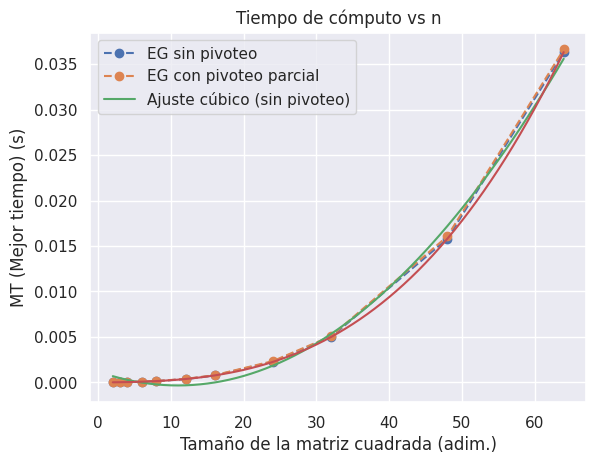

In [ ]:
n_prueba = [2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64]
tiempos_sin_pivoteo = []
tiempos_con_pivoteo = []
for n in n_prueba:
    matrices_triangular_inferior = generar_grupo_triangulares_inferiores(1000, n, 1, 100)
    matrices_triangular_inferior_copia = deepcopy(matrices_triangular_inferior)
    tiempos = %timeit -q -c -r 100 -n 10 -o ejecutar_algoritmo_eg_sin_pivoteo(matrices_triangular_inferior)
    tiempos_sin_pivoteo.append(tiempos.best)
    tiempos = %timeit -q -c -r 100 -n 10 -o ejecutar_algoritmo_eg_con_pivoteo_parcial(matrices_triangular_inferior_copia)
    tiempos_con_pivoteo.append(tiempos.best)
print(tiempos_sin_pivoteo, tiempos_con_pivoteo)

# Ambos algoritmos son casi identicos en velocidad, y se cumple lo esperado:
# Con pivote es muy levemente más lento. La ganancia en disminución en error
# numérico más que compensa este cambio en eficiencia.
p3 = np.poly1d(np.polyfit(n_prueba, tiempos_sin_pivoteo, 3))
# p2 = np.poly1d(np.polyfit(n_prueba, tiempos_sin_pivoteo, 2, ))
plt.plot(n_prueba, tiempos_sin_pivoteo, "--o")
plt.plot(n_prueba, tiempos_con_pivoteo, "--o")
# plt.plot(np.arange(2,65), p2(np.arange(2,65)))
plt.plot(np.arange(2,65), p3(np.arange(2,65)))
plt.title("Tiempo de cómputo vs n")
plt.ylabel("MT (Mejor tiempo) (s)")
plt.xlabel("Tamaño de la matriz cuadrada (adim.)")
plt.legend(["EG sin pivoteo", "EG con pivoteo parcial", "Ajuste cúbico (sin pivoteo)"])
plt.savefig("EG_sin_vs_con_pivoteo.svg", bbox_inches = "tight")
# files.download("EG_sin_vs_con_pivoteo.svg")
plt.show()

[1.1499999993702659e-05, 1.8299999999271678e-05, 2.66999999894324e-05, 4.5399999999062855e-05, 6.93999999953121e-05, 0.00012820000000601794, 0.0002036999999972977, 0.00040309999999408317, 0.000664500000004864, 0.001386000000002241, 0.0023917999999980566, 0.005210799999997562, 0.009100499999999557] [6.899999993947858e-06, 7.500000003801688e-06, 7.8999999914231e-06, 8.900000000267028e-06, 9.799999997994745e-06, 1.190000000406144e-05, 1.3999999998759449e-05, 1.790000000028158e-05, 2.1699999990687502e-05, 2.969999999322681e-05, 3.729999999677602e-05, 5.5999999995037796e-05, 7.279999999809661e-05]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

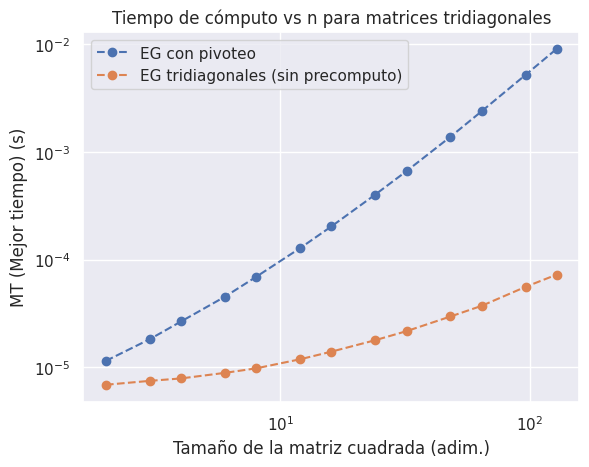

In [ ]:
n_prueba = [2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96, 128]
tiempos_con_pivoteo_tridiagonales = []
tiempos_con_eg_cuidadosa_tridiagonales = []
for n in n_prueba:
    matrices_tridiagonales = generar_grupo_tridiagonales(5000, n, 1, 100)
    diagonales = generar_diagonales_de_matrices_tridiagonales(matrices_tridiagonales)
    tiempos = %timeit -q -c -r 100 -n 50 -o ejecutar_algoritmo_eg_con_pivoteo_parcial(matrices_tridiagonales)
    tiempos_con_pivoteo_tridiagonales.append(tiempos.best)
    tiempos = %timeit -q -c -r 100 -n 50 -o ejecutar_algoritmo_eg_diagonales(diagonales)
    tiempos_con_eg_cuidadosa_tridiagonales.append(tiempos.best)
print(tiempos_con_pivoteo_tridiagonales, tiempos_con_eg_cuidadosa_tridiagonales)

# El algoritmo con EG cuidadosa para tridiagonales es significativamente más
# rápido que el algoritmo general.
plt.plot(n_prueba, tiempos_con_pivoteo_tridiagonales, "--o")
plt.plot(n_prueba, tiempos_con_eg_cuidadosa_tridiagonales, "--o")
plt.title("Tiempo de cómputo vs n para matrices tridiagonales")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("MT (Mejor tiempo) (s)")
plt.xlabel("Tamaño de la matriz cuadrada (adim.)")
plt.legend(["EG con pivoteo", "EG tridiagonales (sin precomputo)"])
plt.savefig("EG_con_pivoteo_vs_tridiag.svg", bbox_inches = "tight")
# files.download("EG_con_pivoteo_vs_tridiag.svg")
plt.show()

# plt.plot(n_prueba, tiempos_con_pivoteo_tridiagonales, "--o")
# plt.plot(n_prueba, tiempos_con_eg_cuidadosa_tridiagonales, "--o")
# plt.title("Tiempo de cómputo vs n para matrices tridiagonales")
# plt.ylabel("MT (Mejor tiempo) (s)")
# plt.xlabel("Tamaño de la matriz cuadrada (adim.)")
# plt.legend(["EG con pivoteo", "EG tridiagonales (sin precomputo)"])
# plt.savefig("EG_con_pivoteo_vs_tridiag_lineal.svg", bbox_inches = "tight")
# files.download("EG_con_pivoteo_vs_tridiag_lineal.svg")
# plt.show()

[6.83500000013737e-06, 7.280000000037035e-06, 7.753999999977168e-06, 8.870000000115396e-06, 9.80400000003101e-06, 1.1940999999978885e-05, 1.3601000000107887e-05, 1.728499999990163e-05, 2.138100000001941e-05, 2.8611000000182686e-05, 3.5853000000088285e-05, 5.2924000000075464e-05, 6.907999999998537e-05]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

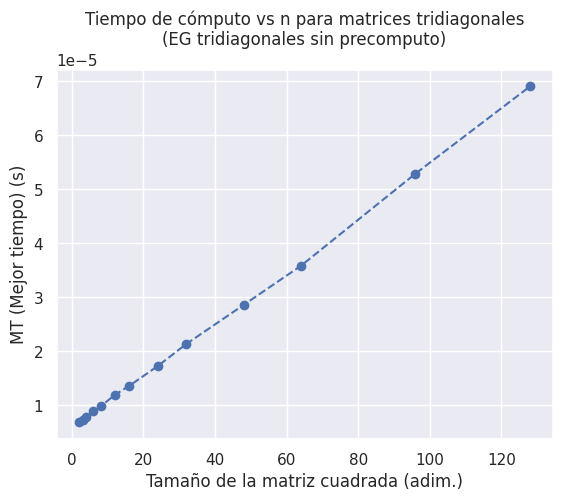

In [ ]:
tiempos_con_eg_cuidadosa_tridiagonales = []
for n in n_prueba:
    diagonales = generar_grupo_diagonales_tridiagonal(200000, n, 1, 100)
    tiempos = %timeit -q -c -r 200 -n 1000 -o ejecutar_algoritmo_eg_diagonales(diagonales)
    tiempos_con_eg_cuidadosa_tridiagonales.append(tiempos.best)
print(tiempos_con_eg_cuidadosa_tridiagonales)

# Para analizar cómo se ve la curva para el algoritmo con EG cuidadosa, se la
# puede plottear por su cuenta. Se observa el comportamiento lineal esperado.
plt.plot(n_prueba, tiempos_con_eg_cuidadosa_tridiagonales, "--o")
plt.title("Tiempo de cómputo vs n para matrices tridiagonales\n(EG tridiagonales sin precomputo)")
plt.ylabel("MT (Mejor tiempo) (s)")
plt.xlabel("Tamaño de la matriz cuadrada (adim.)")
plt.savefig("EG_tridiag.svg", bbox_inches = "tight")
# files.download("EG_tridiag.svg")
plt.show()

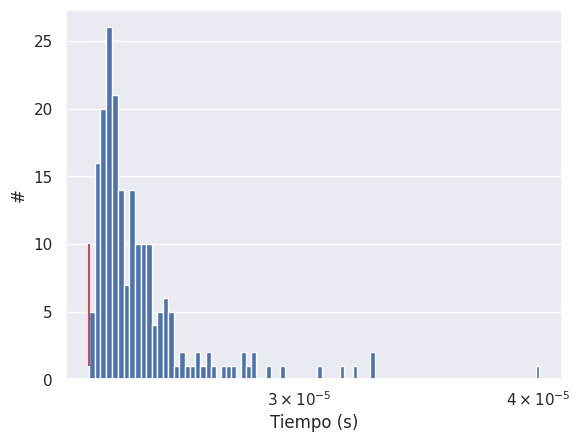

In [ ]:
# Distribución de tiempos
plt.hist(tiempos.timings, bins = 100)
plt.ylabel('#')
plt.xlabel('Tiempo (s)');
plt.xscale('log')
plt.vlines(tiempos.best,1,10, color='r')
plt.show()

[[0.01931300000023839, 0.0387020000002849, 0.05799899999965419, 0.07768699999996898, 0.09719799999993484], [0.032756999999946856, 0.06589100000019243, 0.09864599999946222, 0.13196999999991021, 0.16525200000023688], [0.04858599999988655, 0.09702500000003056, 0.14667300000019168, 0.1946499999999105, 0.2436609999999746], [0.0628420000002734, 0.12653399999999237, 0.19220799999993685, 0.25207300000010946, 0.31616300000041525]] [[0.012283000000024913, 0.013840000000072905, 0.020864999999957945, 0.02797999999984313, 0.03472699999974793], [0.007059000000026572, 0.013931999999840627, 0.021005999999943015, 0.028048000000126194, 0.03510199999982433], [0.006931999999778782, 0.014036999999916588, 0.02115700000013021, 0.028051999999661348, 0.035108000000036554], [0.007027000000107364, 0.014072999999825697, 0.021106000000145286, 0.02832799999987401, 0.03487100000029386]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

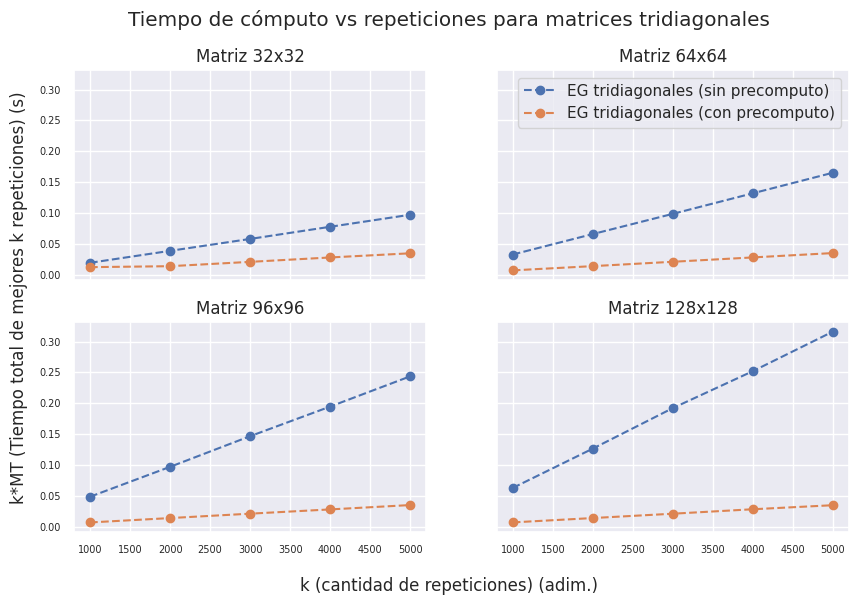

In [ ]:
ipy = get_ipython()
n_prueba = [32, 64, 96, 128]
k_prueba = [1000, 2000, 3000, 4000, 5000]
tiempos_sin_precomputo = []
tiempos_con_precomputo = []
for n in n_prueba:
    tiempos_sin_precomputo.append([])
    tiempos_con_precomputo.append([])
    matriz_tridiagonal_n = generar_tridiagonal(n, 1, 100)
    a_n, b_n, c_n = diagonales_de_matriz_tridiagonal(matriz_tridiagonal_n)
    diagonal_n, operaciones_n = precomputo_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(a_n, b_n, c_n)
    for k in k_prueba:
        tiempos = ipy.magic(f"timeit -q -c -r 100 -n {str(k)} -o ejecutar_algoritmo_eg_diagonales_sin_precomputo_matriz_unica((a_n, b_n, c_n))")
        tiempos_sin_precomputo[-1].append(k*tiempos.best)
        tiempos = ipy.magic(f"timeit -q -c -r 100 -n {str(k)} -o ejecutar_algoritmo_eg_diagonales_con_precomputo_matriz_unica(diagonal_n, operaciones_n)")
        tiempos_con_precomputo[-1].append(k*tiempos.best)
print(tiempos_sin_precomputo, tiempos_con_precomputo)

# Los resultados son los esperados: con precomputo el algoritmo es más rápido,
# ambos algoritmos son lineales respecto al número de repeticiones,
# y el efecto del precomputo es relativamente mayor cuantas más repeticiones
# son realizadas y cuanto más grande (y costosa de triangular) es la matriz input.
matplotlib.rc('xtick', labelsize=7)
matplotlib.rc('ytick', labelsize=7)
fig, axs = plt.subplots(2, 2, sharex = True, sharey = True, figsize=(10, 6))
fig.suptitle("Tiempo de cómputo vs repeticiones para matrices tridiagonales")
for i, (n, tiempos_sin_precomputo_n, tiempos_con_precomputo_n) in enumerate(zip(n_prueba, tiempos_sin_precomputo, tiempos_con_precomputo)):
    ax = axs[i//2, i%2]
    ax.plot(k_prueba, tiempos_sin_precomputo_n, "--o")
    ax.plot(k_prueba, tiempos_con_precomputo_n, "--o")
    ax.set_title(f"Matriz {n}x{n}")

axs[0,1].legend(["EG tridiagonales (sin precomputo)", "EG tridiagonales (con precomputo)"])
fig.text(0.5, 0.02, "k (cantidad de repeticiones) (adim.)", ha = "center", va = "center")
fig.text(0.07, 0.5, "k*MT (Tiempo total de mejores k repeticiones) (s)", ha = "center", va = "center", rotation = "vertical")
plt.savefig("EG_tridiag_sin_vs_con_precomp.svg", bbox_inches = "tight")
# files.download("EG_tridiag_sin_vs_con_precomp.svg")
plt.show()

# 5. Hallar funciones a partir de sus derivadas segundas

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

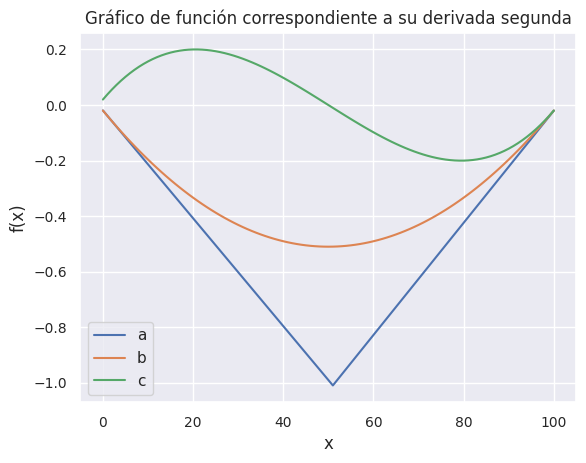

In [ ]:
n = 101
n_range = np.arange(0, n)
laplaciano_a = transpuesta([[0] + [1]*(n-1)])
laplaciano_b = transpuesta([[-2]*(n)])
laplaciano_c = transpuesta([[1]*(n-1) + [0]])
d5a = transpuesta([[4/n if i == 101//2+1 else 0 for i in n_range]])
d5b = transpuesta([[4/(n**2)]*n])
d5c = transpuesta([(-1 + 2*n_range/(n-1))*12/(n**2)])
diagonal_laplaciano, operaciones = precomputo_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(laplaciano_a, laplaciano_b, laplaciano_c)
x5a = solucion_sistema_tridiagonal_precomputado(diagonal_laplaciano, d5a, operaciones)
x5b = solucion_sistema_tridiagonal_precomputado(diagonal_laplaciano, d5b, operaciones)
x5c = solucion_sistema_tridiagonal_precomputado(diagonal_laplaciano, d5c, operaciones)
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
plt.plot(n_range, x5a)
plt.plot(n_range, x5b)
plt.plot(n_range, x5c)
plt.legend(["a", "b", "c"])
plt.title("Gráfico de función correspondiente a su derivada segunda")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig("integrales_derivadas_segundas.svg", bbox_inches = "tight")
# files.download("integrales_derivadas_segundas.svg")
plt.show()

# 6. Simulación de difusión

In [ ]:
def simular_difusion(tamaño_segmento_lineal: int,
                     pasos_temporales: int,
                     rango_concentrado_inicial: int,
                     factor_de_difusion: float) -> list[list[float]]:
    n, r = tamaño_segmento_lineal, rango_concentrado_inicial
    evolucion = [transpuesta([[1 if n//2-r < i < n//2+r else 0 for i in range(n)]])] # inicial
    laplaciano_dif_a = transpuesta([[0] + [-factor_de_difusion]*(n-1)])
    laplaciano_dif_b = transpuesta([[2*factor_de_difusion + 1]*n])
    laplaciano_dif_c = transpuesta([[-factor_de_difusion]*(n-1) + [0]])
    diagonal_dif, operaciones = precomputo_sistema_tridiagonal_eliminacion_gaussiana_cuidadosa(laplaciano_dif_a, laplaciano_dif_b, laplaciano_dif_c)
    for _ in range(pasos_temporales):
        evolucion.append(solucion_sistema_tridiagonal_precomputado(diagonal_dif, evolucion[-1], operaciones))
    return evolucion

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

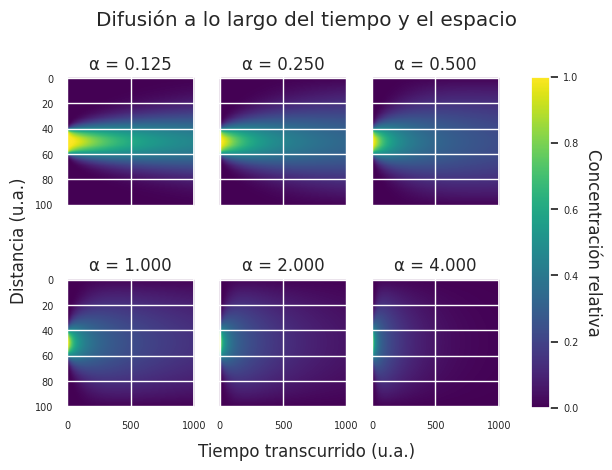

In [ ]:
# 6.b.
n = 101
r = 10
m = 1000

matplotlib.rc('xtick', labelsize=7)
matplotlib.rc('ytick', labelsize=7)
fig, axs = plt.subplots(2, 3, sharex = True, sharey = True)
fig.suptitle("Difusión a lo largo del tiempo y el espacio")
for i, alfa in enumerate([0.125, 0.25, 0.5, 1, 2, 4]):
    ax = axs[i//3, i%3]
    evolucion = simular_difusion(n, m, r, alfa)
    img = ax.imshow(transpuesta(evolucion), "viridis", aspect = 10)
    ax.set_title(f"α = {alfa:.3f}")

fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.69])
cbar = ax.figure.colorbar(img, cax=cbar_ax)
cbar_ax.set_ylabel("Concentración relativa", rotation = -90, va = "bottom")
fig.text(0.5, 0.06, "Tiempo transcurrido (u.a.)", ha = "center", va = "center")
fig.text(0.05, 0.5, "Distancia (u.a.)", ha = "center", va = "center", rotation = "vertical")
plt.savefig("difusion.svg", bbox_inches = "tight")
# files.download("difusion.svg")
plt.show()